In [1]:
# Pour que les changements dans les modules importés (bandits.py) soient pris en compte
%load_ext autoreload
%autoreload 2
# Pour afficher les figures dans le notebook
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Changement des paramètres d'affichage par défaut
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20, 10
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['font.size'] = 24
mpl.rcParams['lines.markersize'] = 15
mpl.rcParams['axes.grid'] = True
# mpl.rcParams.find_all('')

In [4]:
try:
    # Pour utiliser la correction (prof)
    import bandits_correction as bandits
    import exp_correction
    print('Correction importée')
except:
    # Pour utiliser le code fourni à compléter (étudiants)
    import bandits_contextuels as bandits

# Exemple de problème de bandits Contextuels

In [8]:
# Création d'un problème avec 4 bras
bandits_ln = bandits.LinearBandits(4,10) # 4 arms, 10 features 
print(bandits_ln)

4-arms linear bandit in dimension 10


In [23]:
print(bandits_ln._theta)

[[ 1.07468962  0.2864964   1.27387867  0.76635834]
 [-0.55130365 -0.96991845 -0.6143035  -1.18862668]
 [-0.90679981  0.44646146 -1.32801742  0.37586417]
 [-0.34075193  0.48353028  0.60027629 -2.17374361]
 [-0.42611876 -0.33980325 -0.99240322  0.77749477]
 [-0.2313577   0.41455747  1.39268192  0.97063973]
 [-0.40523227 -0.01139495  0.60316208  1.76583522]
 [ 1.0036541   0.25468086  0.54326772  0.85032955]
 [-0.18570268 -0.18345361 -1.47003573  1.48518197]
 [-1.10140544 -0.7075525   1.00867412 -1.88746215]]


In [24]:
bandits_ln._theta[0]

array([1.07468962, 0.2864964 , 1.27387867, 0.76635834])

In [26]:
bandits_ln._theta[:, 0]

array([ 1.07468962, -0.55130365, -0.90679981, -0.34075193, -0.42611876,
       -0.2313577 , -0.40523227,  1.0036541 , -0.18570268, -1.10140544])

In [18]:
print('On tire 10 fois le bras 0 et on affiche les récompenses:')
for _ in range(10):
    x = bandits_ln.get_context()
    print(int(bandits_ln.step(a=0,x=x)))

On tire 10 fois le bras 0 et on affiche les récompenses:
-1
-1
5
-3
-2
0
2
-1
2
-4


In [19]:
print('On tire 10 fois le bras 1 et on affiche les récompenses:')
for _ in range(10):
    x = bandits_ln.get_context()
    print(int(bandits_ln.step(a=1,x=x)))

On tire 10 fois le bras 1 et on affiche les récompenses:
0
0
0
0
1
-1
0
0
0
0


Gain moyen du bras 0 sur 100 tirages: 0.049 )
Gain moyen du bras 1 sur 100 tirages: -0.041 )
Gain moyen du bras 2 sur 100 tirages: -0.022 )
Gain moyen du bras 3 sur 100 tirages: 0.421 )


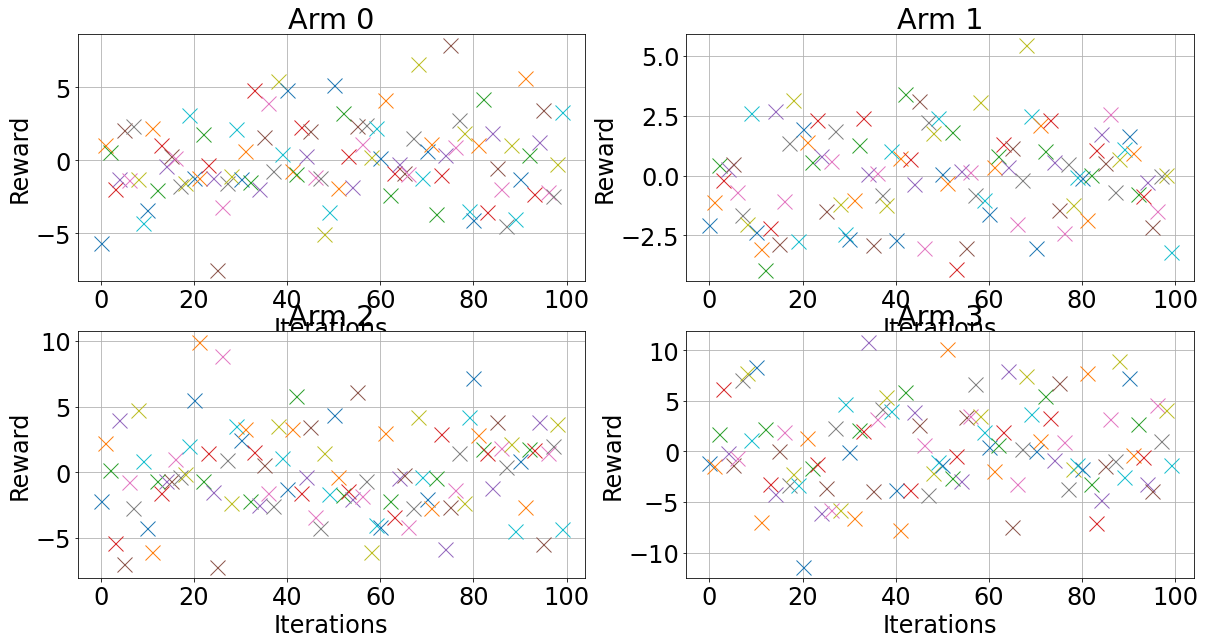

In [22]:
# Tirer 100 fois chaque bras 
# et comparer la moyenne des gains aux vraies valeurs des bras (espérances inconnues)
n_draws = 100
for i_arm in range(bandits_ln.n_arms):
    x = 0
    plt.subplot(2, 2, i_arm+1)
    for i_draw in range(n_draws):
        c = bandits_ln.get_context()
        r = bandits_ln.step(a=i_arm,x=c)
        x += r
        plt.plot(i_draw, r, 'x')
    plt.title('Arm {}'.format(i_arm))
    plt.xlabel('Iterations')
    plt.ylabel('Reward')
    print('Gain moyen du bras {} sur {} tirages: {:.3f} )'
          .format(i_arm, n_draws, x/n_draws)) #, bandits_ln._true_values[i_arm] , (espérance du bras: {:.3f}